In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import torch
from pathlib import Path

##### File paths of trained models

In [24]:
path0 = Path("../training_outputs/d5_d_t_5_240223-103744.pt")
path1 = Path("../training_outputs/d5_d_t_5_240223-103813.pt")
paths = [path0, path1]

##### Load and plot

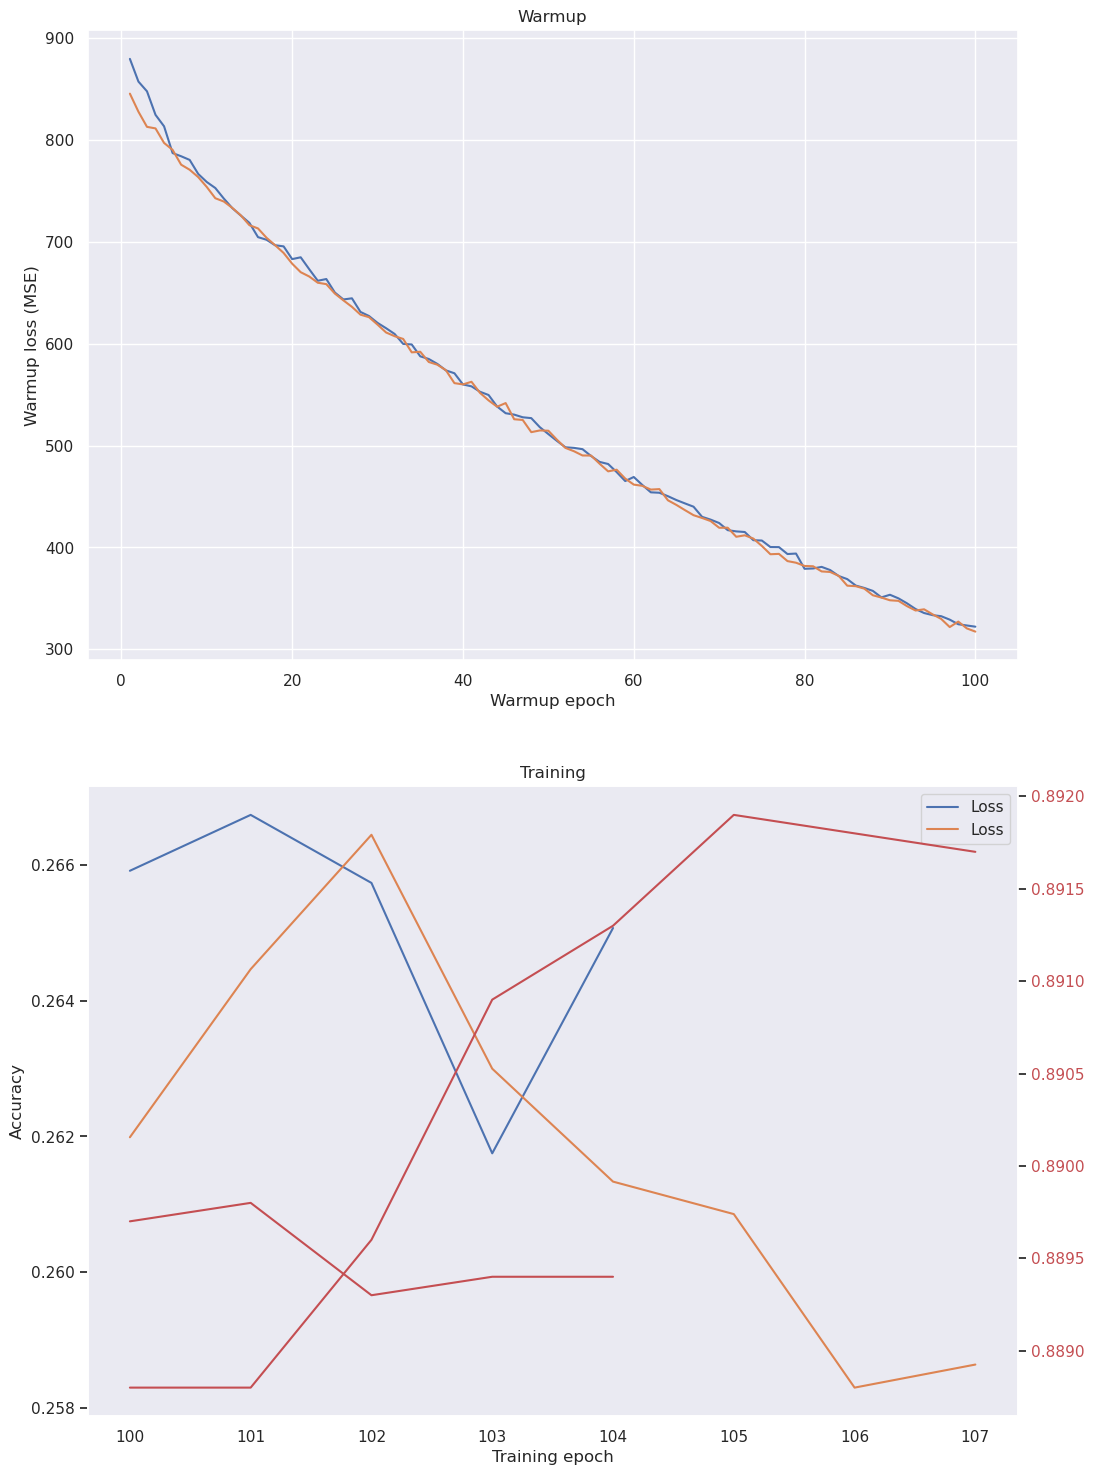

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(12, 18))

for i, path in enumerate(paths):

    training_data = torch.load(path, map_location="cpu")
    history = training_data["training_history"]
    settings = training_data["training_settings"]

    train_loss = history["train_loss"]
    val_accuracy = history["val_accuracy"]
    n_epochs = history["epoch"] + 1

    if n_epochs > settings["warmup_epochs"]:
        x_warmup = range(1, settings["warmup_epochs"] + 1)
        ax[0].plot(x_warmup, train_loss[: settings["warmup_epochs"]])
        ax[0].set_ylabel("Warmup loss (MSE)")
        ax[0].set_title("Warmup")
        ax[0].set_xlabel("Warmup epoch")

        x = range(settings["warmup_epochs"], n_epochs + 1)
        ax[1].plot(x, train_loss[settings["warmup_epochs"]:], label="Loss")
        
        if i == 0:
            r_ax = ax[1].twinx()
        r_ax.plot(x, val_accuracy[settings["warmup_epochs"]:], "r", label="Accuracy")
        r_ax.tick_params(axis='y', labelcolor="r")
        ax[1].set_title("Training")
        ax[1].set_xlabel("Training epoch")
        ax[1].set_ylabel("Accuracy")
        ax[1].legend()
        
        r_ax.grid(False)
        ax[1].grid(False)
    else:
        x_warmup = range(1, n_epochs + 1)
        ax[0].plot(x_warmup, train_loss[: settings["warmup_epochs"]])